# The Workshop

All ideas to be tested out here.

#### Imports & Preparing our Image
<i>Note: I've had issues importing threshold_multiotsu through Jupyter notebook. If this problem persists, there is a file called "test.py" which functions the same as the methods and driver code down below; use pip to update scikit-image, and then run that .py file using command prompt. To try and fix the notebook issue, copy and paste this code into a code block in this notebook and then run it:</i><br />
`import sys
!conda install --yes --prefix {sys.prefix} scikit-image`<br />
<i>You can also try to fully update your conda environment by opening your anaconda prompt and using:</i><br />
`conda update --all`

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from skimage import io, data
from skimage.filters import threshold_multiotsu
from skimage.exposure import rescale_intensity
from skimage.io import imread
from PIL import Image

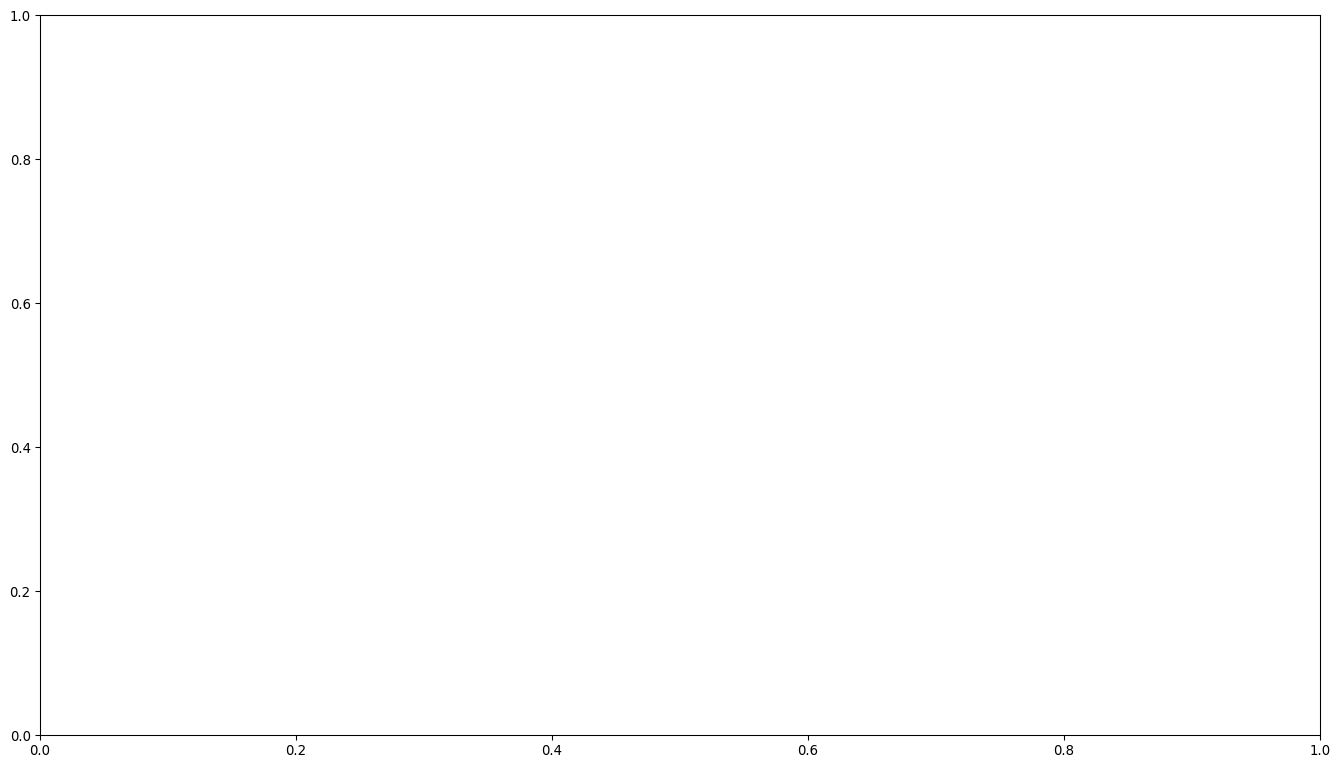

In [2]:
# Open our image
mouse = imread('segmented_mouse.jpg', as_gray=True)
mouseImg = Image.open('segmented_mouse.jpg')

# Fetch dpi
if(mouseImg.info.get('dpi')):
    x_dpi, y_dpi = mouseImg.info['dpi']
#img_dpi = (x_dpi + y_dpi) / 2
img_dpi = 96

# Set up figure
fig = plt.figure(figsize=(float(mouseImg.size[0])/img_dpi, float(mouseImg.size[1])/img_dpi), dpi=img_dpi)
ax = fig.add_subplot(111)

# Remove whitespace from around the image
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

#### Grid
Skip this code block for gridless structure.

In [3]:
# Set the gridding interval
interval_frameShape = mouse.shape
print(interval_frameShape)
interval_cellSize = interval_frameShape / np.sqrt(32) # The number in np.sqrt() is the number of cells
print(interval_cellSize)
mouse_xInterval = interval_cellSize[0]
mouse_yInterval = interval_cellSize[0]
xloc = plticker.MultipleLocator(base=mouse_xInterval)
yloc = plticker.MultipleLocator(base=mouse_yInterval)
ax.xaxis.set_major_locator(xloc)
ax.yaxis.set_major_locator(yloc)

# Add the grid
ax.grid(which='major', axis='both', linestyle='-')

(720, 1280)
[127.27922061 226.27416998]


#### Show the image

In [4]:
# Add the image in grayscale
ax.imshow(mouse, cmap=plt.cm.Greys_r)

#### Label cells with numbers
Labeling must come after showing the image or the labels will not appear. Skip this code block for gridless structure.

In [5]:
# To additionally label each cell with a number
# Find number of gridsquares in x and y direction
nx = abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(mouse_xInterval)))
ny = abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(mouse_yInterval)))

# Add labels
for i in range(ny):
    y = mouse_yInterval / 2 + i * mouse_yInterval
    for j in range(nx):
        x = mouse_xInterval / 2. + float(j) * mouse_xInterval
        ax.text(x, y, '{:d}'.format(i+j*nx), color='r', ha='center', va='center')

NameError: name 'mouse_xInterval' is not defined

In [5]:
# debug
nx = abs(int(float(ax.get_xlim()[1]-ax.get_xlim()[0])/float(mouse_xInterval)))
ny = abs(int(float(ax.get_ylim()[1]-ax.get_ylim()[0])/float(mouse_yInterval)))

# Add labels
for i in range(ny):
    y = mouse_yInterval / 2 + i * mouse_yInterval
    for j in range(nx):
        x = mouse_xInterval / 2. + float(j) * mouse_xInterval
        ax.text(y, x, '{:d}'.format(i+j*ny), color='r', ha='center', va='center')

#### Save Image

In [6]:
# Save file
fig.savefig('gridline_mouse.png', dpi=img_dpi)

This first image is used as a live preview for the user; it is so they can determine which _key cells_ they want to select. The program, when running through each frame, won't create gridlines like this, or label them, but it _will_ know the location of cells.

#### Show low-res plot in this Notebook
Run the code in the next block to show the preview or just check the file directory for the full-res version.
To see a segmentation-ready version, just avoid running the code blocks for the grid and the number overlay. This will produce just the normalized, B/W image.

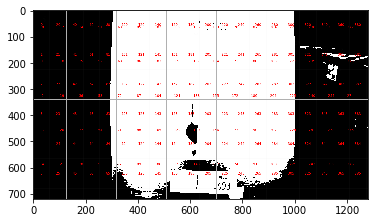

In [20]:
plt.imshow(imread("gridline_mouse.png"))

### Implementing Otsu's Method (Two-Color Segmentation)
For two-color segmentation on gridline-structured frames.

In [21]:
def frameCapture(fc_path):
    fc_vidObj = cv2.VideoCapture(fc_path) # Path to video file
    fc_count = 0                          # Used as counter variable
    fc_success = 1                        # Checks if the frames were extracted
    
    while fc_success:
        # vidObj object calls read
        fc_success, fc_image = fc_vidObj.read()
        fc_image = cv2.cvtColor(fc_image, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
        fc_image = cv2.GaussianBlur(fc_image,(5,5),0) # Gaussian noise filtering
        (threshold, fc_image) = cv2.threshold(fc_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Normalize & Segment
        cv2.imwrite("frame%d.jpg" % fc_count, fc_image) # Saves the frames
        fc_count += 1

### Implementing Otsu's Method (Three-Color Segmentation)
For three-color segmentation on blob-based structure frames.
<br />Reference: https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_multiotsu.html
<br />Also references article from <b>Taking a video in as Input...</b> section.

In [9]:
# Function to extract frames
def frameCaptureMulti(fc_path):
    fc_vidObj = cv2.VideoCapture(fc_path) # Path to video file
    fc_count = 0                          # Used as counter variable
    fc_success = 1                        # Checks if the frames were extracted
    
    while fc_success:
        # vidObj object calls read
        fc_success, fc_image = fc_vidObj.read()
        fc_image = cv2.cvtColor(fc_image, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
        fc_image = cv2.GaussianBlur(fc_image,(5,5),0) # Gaussian noise filtering
        fc_thresholds = threshold_multiotsu(fc_image)
        fc_regions = np.digitize(fc_image, bins=fc_thresholds)
        fc_rescaled = rescale_intensity(fc_regions)
        cv2.imwrite("frame%d.jpg" % fc_count, fc_regions) # Saves the frames
        fc_count += 1

### Taking a Video in as Input and Creating Raw Frames
This code block is the same as frameCapture() above! <br />
Explanation of Python library, methods, code, &c.
Function reference: https://www.geeksforgeeks.org/python-program-extract-frames-using-opencv/

In [2]:
# Function to extract frames
def frameCapture(fc_path):
    fc_vidObj = cv2.VideoCapture(fc_path) # Path to video file
    fc_count = 0                          # Used as counter variable
    fc_success = 1                        # Checks if the frames were extracted
    
    while fc_success:
        # vidObj object calls read
        fc_success, fc_image = fc_vidObj.read()
        fc_image = cv2.cvtColor(fc_image, cv2.COLOR_BGR2GRAY) # Convert the image to grayscale
        fc_image = cv2.GaussianBlur(fc_image,(5,5),0) # Gaussian noise filtering
        (threshold, fc_image) = cv2.threshold(fc_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) # Normalize automatically
        fc_rescaled = rescale_intensity(fc_regions)
        cv2.imwrite("frame%d.jpg" % fc_count, fc_rescaled) # Saves the frames
        fc_count += 1

#### Driver code
Run one of the functions above and then run the following code block. Force-stop the kernel to prevent the program from going through the entire video. You will also need to change the "PATH" to an actual path on your computer; e.g.: "C:\\\Users\\\NAME\\\MICEVIDEOS\\\REC_0001.MP4"). Make sure to escape the escape character (use "\\\\" instead of "\\").

In [10]:
# Testing on a mouse video
frameCapture("PATH")

NameError: name 'threshold_multiotsu' is not defined

## Implementing the Grid System
### A Dictionary of Cells
The idea here is to create a dictionary of cells, with each definition containing the range of pixels for each cell on the grid. For example, Cell 0 would be at (0, 0). If each cell was 32x32 px, then Cell 0 would be defined as x0 = 0, x1 = 31, y0 = 0, y1 = 31, or (0, 31), (0, 31). If we wanted to get a cell's range to plug in to our trimming formula from a notebook or two ago, we'd need to use something like cells[0][0][0] to get the x0 value for Cell 0. A function could be written for sequence unpacking: extract cells[n][0][0], cells[n][0][1], cells[n][1][0], cells[n][1][1], and populate temporary variables x0, x1, y0, y1, for example.
The code would look something along the lines of:<br />
`x0, x1, y0, y1 = f(x)`<br />
`trimmed = image[x0:x1, y0:y1]`<br />
Where `f(x)` is our function for extracting the coordinates from the dictionary.
### Defining our Dictionary and a Function to Populate it